# **Initial EDA With Pandas**

In [ ]:
!pip install pandas
import pandas as pd



In [ ]:
# Load Dataset and Display first few Rows #
df = pd.read_csv('AllEars.csv')
df.head(3)


,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,400.0,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...
1,401.0,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...
2,402.0,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...


In [ ]:
data = df.dropna(inplace = True)
df.isnull().sum()
duplicates = df.drop_duplicates()
df['rating'] = df['rating'].astype(float)

In [ ]:
# Descriptive Statistics as Function #
!pip install numpy
import numpy as np
import scipy.stats as stats

mean = df["rating"].mean()
median = df['rating'].median()
mode = df['rating'].mode()
variance = df['rating'].var()
print(mean)
print(median)
print(mode)
print(variance)


4.1506228765571915
4.0
0    5.0
Name: rating, dtype: float64
1.1507564143060018


In [ ]:
from collections.abc import ValuesView
#Identify Missing Values#
df.isnull().sum()

,0
Unnamed: 0,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,0
is_verified,0


In [ ]:
# Check for duplicates#
df.duplicated().sum()

0

# **Data Visualization **






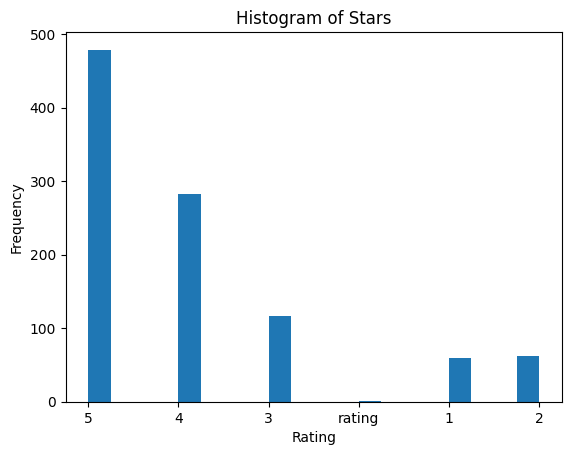

In [ ]:
# Create a Histogram #
import matplotlib.pyplot as plt
df = pd.read_csv('AllEars.csv')
plt.hist(df['rating'], bins = 20)
plt.title('Histogram of Stars')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


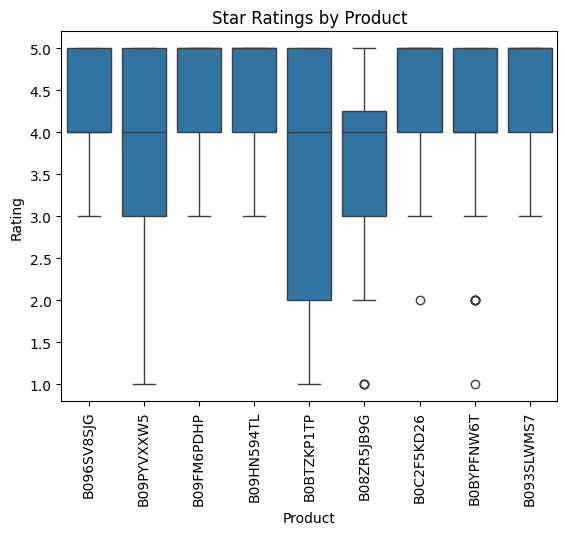

In [ ]:
# Box Plot #
import seaborn as sns
sns.boxplot(x='product_id', y="rating", data = df)
plt.title('Star Ratings by Product')
plt.xlabel('Product')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


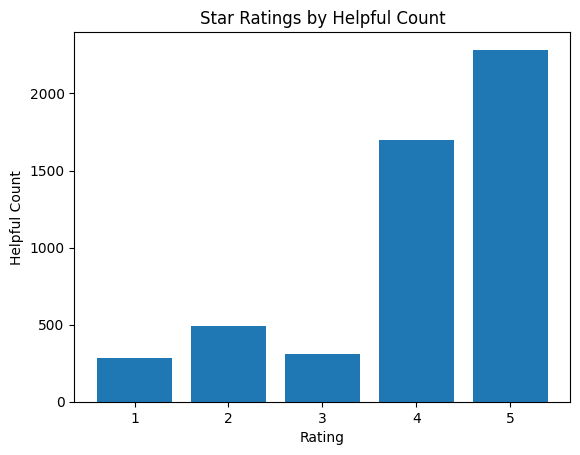

In [ ]:
#Bar Chart#
plt.bar(df['rating'], df['helpful_count'])
plt.title('Star Ratings by Helpful Count')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.show()

# **Correlation Analysis **

In [ ]:
print(df.dtypes)

Unnamed: 0            float64
review_id              object
product_id             object
title                  object
author                 object
rating                float64
content                object
timestamp              object
profile_id             object
is_verified            object
helpful_count          object
product_attributes     object
dtype: object


In [ ]:
# Correlation Matrix #
import numpy as np
from scipy.stats import pearsonr
df.drop('product_attributes', axis=1, inplace=True)
correlation_matrix = df.corr()
print("correlation_matrix:\\n", correlation_matrix)

correlation_matrix:\n                  rating  helpful_count
rating         1.000000       0.022209
helpful_count  0.022209       1.000000


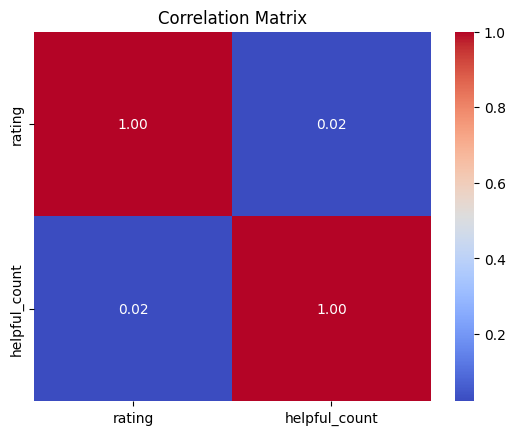

In [ ]:
# Visualizing Correlation Matrix #
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Sentiment Analysis**
• Perform sentiment analysis on the text reviews. • Classify the reviews into positive, negative, and neutral sentiments. • Aggregate the sentiment scores to assess overall consumer sentiment.

In [ ]:
df = pd.read_csv('AllEars.csv')
df['content'] = df['content'].astype('string')
df.dtypes
df.head()


,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,400.0,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...
1,401.0,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...
2,402.0,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...
3,403.0,R29LYUZ7DI2CS6,B096SV8SJG,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,1,0,Color: BlackStyle: Studio BudsSet: Without App...
4,404.0,RRC5SI8P44LH4,B096SV8SJG,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,1,3,Color: Sunset PinkStyle: Studio BudsSet: Witho...


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
text = df['content'][0]
Sentiment = sia.polarity_scores(text)
print(Sentiment)


{'neg': 0.077, 'neu': 0.74, 'pos': 0.184, 'compound': 0.9985}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from textblob import TextBlob
blob = TextBlob(text)
sentiment = blob.sentiment
print(sentiment)

Sentiment(polarity=0.16530880230880232, subjectivity=0.5307694003527337)


# **Conclusion **

In terms of the EDA analysis, there were quite a few outliers. People either really loved the earbuds, or were generally not a fan. The mean of all earbuds was 4.15 which meant that customers loved the earbud selections.
The histogram focuses on the frequency or number of people that gave each rating. It sheds light into understanding what the highest rating was and how the data was spread out between 1-5 stars. The box plot focuses on the ratings based on each product. This helps each company understand how they are doing compared to others while also seeing the few outliers. The bar chart focuses on how helpful each review rating was. This means around 500 people found the 2 star review to be extremly helpful for example. The heatmap compares the rating and the helpful count. I was having an issue working witht the datasheet itself and viewing the sentiment analyzer, instead I chose to extract random comments under the content section to review. This allowed me to get a good understanding of the sentinment values of customers that purchased the various earbuds. The score told me that overall 7.7% of the comments had negative words or attributes, 74% had neutral sentiments, and 18.4 had postive words. For Beats by Dre, people have a strong liking towards the products they are using, however, some improvements or new feautures are necessary to score higher than neutral and wow customers. Earphones compared were HTC, 1More Comfo Buds, JBL Tune 230NC, JLAB Go Air pop, Beats Studio Buds, Jabra Elite 4, Sennheiser consumer, Skullcandy smokin' buds, Soundcore by Anker, and much more! The polarity score was 0.165 which means overall the comments were more postive and the subjectivity score of 0.53 means the majority of these comments were based on opinions.



In [ ]:

df1 = pd.read_csv('Beats.csv')
df1.head()

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
text = df1['content'][0]
Sentiment = sia.polarity_scores(text)
print(Sentiment)

from textblob import TextBlob
blob = TextBlob(text)
sentiment2 = blob.sentiment
print(sentiment2)

{'neg': 0.077, 'neu': 0.74, 'pos': 0.184, 'compound': 0.9985}
Sentiment(polarity=0.16530880230880232, subjectivity=0.5307694003527337)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Beats Dataset
df2 = pd.read_csv('Beats.csv')
missing = df2.dropna(inplace = True)
Duplicates = df2.drop_duplicates()
df2['rating'] = df2['rating'].astype(float)